# Imports and loading the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('beer_reviews.csv')
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


# Question 1: Which brewery produces the strongest beers by abv?

Let's group the data by both breweries and beers they produce, while displaying the abv of the beers (and getting rid of any lacking data).

In [2]:
data_grouped = data.groupby(['brewery_name', 'beer_name'])['beer_abv'].mean()
data_grouped = data_grouped.reset_index()
data_grouped = data_grouped.dropna()
data_grouped

,brewery_name,beer_name,beer_abv
0,'t Hofbrouwerijke,Blondelle,8.0
1,'t Hofbrouwerijke,Bosprotter,8.5
2,'t Hofbrouwerijke,Hof Korvatunturi,11.0
3,'t Hofbrouwerijke,Hofblues,5.5
4,'t Hofbrouwerijke,Hofdraak,6.5
...,...,...,...
65674,Ørbæk Bryggeri,Nutty Nut Brown Ale,5.0
65675,Ørbæk Bryggeri,Old Danish Braggot,10.1
65676,Ørbæk Bryggeri,Pale Ale,5.0
65677,Ørbæk Bryggeri,WeissBier Hyldeblomst,5.0


Let's also do the grouping in a different way - not by aggregating by mean value, but by first occurence. If the data is correct, then the 2 dataframes should be identical (the abv of a particular beer should always be the same, so the mean should be identical to the first occurence).

In [3]:
data_grouped_first = data.groupby(['brewery_name', 'beer_name'])['beer_abv'].first()
data_grouped_first = data_grouped_first.reset_index()
data_grouped_first = data_grouped_first.dropna()
data_grouped_first

,brewery_name,beer_name,beer_abv
0,'t Hofbrouwerijke,Blondelle,8.0
1,'t Hofbrouwerijke,Bosprotter,8.5
2,'t Hofbrouwerijke,Hof Korvatunturi,11.0
3,'t Hofbrouwerijke,Hofblues,5.5
4,'t Hofbrouwerijke,Hofdraak,6.5
...,...,...,...
65674,Ørbæk Bryggeri,Nutty Nut Brown Ale,5.0
65675,Ørbæk Bryggeri,Old Danish Braggot,10.1
65676,Ørbæk Bryggeri,Pale Ale,5.0
65677,Ørbæk Bryggeri,WeissBier Hyldeblomst,5.0


Let's check if that's true.

In [4]:
df = (data_grouped == data_grouped_first)
df.describe()

,brewery_name,beer_name,beer_abv
count,48805,48805,48805
unique,1,1,2
top,True,True,True
freq,48805,48805,47700


As we can see, there are some values that aren't matching. But that's not the main point of this analysis, just a quick data quality check.

Next, let's group and sort the values of the original grouped dataframe to check which brewery makes the strongest beers.

In [5]:
data_brewery = data_grouped.groupby('brewery_name')['beer_abv'].mean()
data_brewery = data_brewery.sort_values(ascending=False)
data_brewery

,beer_abv
brewery_name,
Schorschbräu,24.690000
Shoes Brewery,15.200000
Rome Brewing Company,14.200000
Hurlimann Brewery,13.500000
Alt-Oberurseler Brauhaus,13.200000
...,...
Shandong Taishan Beer Co Ltd,2.500000
Brasserie Almaza S.A.L.,2.257143
Fentimans Ltd.,1.666667


We can see that the brewery that produces the strongest beers is called **Schorschbräu**.

# Question 2: If you had to pick 3 beers to recommend to someone, how would you approach the problem?

My first question to the person would be about their favourite beer style. In order to show that in the data, let's group it accordingly.

In [6]:
data_grouped_style = data.groupby(['beer_style', 'beer_name']).agg(
    mean_review=('review_overall', 'mean'),
    review_count=('review_overall', 'count')
    )
data_grouped_style = data_grouped_style.sort_values(by=['beer_style', 'mean_review', 'review_count'], ascending=[True, False, False])
data_grouped_style

mean_review  review_count
beer_style beer_name                                    
Altbier    Aloha Ambier                5.0             1
           Bierhalle Alt               5.0             1
           Organic Secret Alt          5.0             1
           Schwindel Alt               5.0             1
           Yankee Sticke               5.0             1
...                                    ...           ...
Witbier    Pauw Witbier                1.0             1
           Penn Gwenn                  1.0             1
           Triple Treat                1.0             1
           Vlaamsch Wit                1.0             1
           Wit Cin'd                   1.0             1

[58892 rows x 2 columns]

Another factor I would consider is the number of reviews. One 5 star review doesn't mean a lot to me, but if a beer would be rated around 4 but with hundreds of reviews, I'd rather pick that one.

Accordingly, let's filter the beers that have at least 100 reviews and then sort them by mean review value.

In [7]:
data_grouped_style = data_grouped_style[data_grouped_style['review_count'] > 100]
data_grouped_style

mean_review  review_count
beer_style beer_name                                               
Altbier    Uerige Sticke                     4.230159           315
           Uerige Altbier (Classic)          4.101604           187
           Double Bag                        4.034304           481
           Uerige Doppelsticke               4.005435           368
           Ten Years Alt                     3.886454           251
...                                               ...           ...
Witbier    Blue Moon Grand Cru               3.378307           189
           Major Tom's Pomegranate Wheat     3.306931           202
           Spring Heat Spiced Wheat          3.295238           105
           Samuel Adams Imperial White       3.271777           574
           Shock Top Belgian White           3.250427           585

[3109 rows x 2 columns]

Now we have beers grouped by style and sorted by mean review value. Let's say that the person I'm recommending beers to really loves English Strong Ale style. Let's filter the dataframe accordingly.

In [8]:
data_grouped_style.xs('English Strong Ale', level='beer_style')

,mean_review,review_count
beer_name,,
Fuller's 1845,4.089783,646
Samuel Smith's Yorkshire Stingo,4.006849,292
Geary's Hampshire Special Ale,3.982192,365
Allies Win The War!,3.818584,113
Adnams Broadside Strong Original,3.806667,150
Thomas Jefferson's Tavern Ale,3.787037,216
Pride Of Milford Special Ale,3.740741,108
Coopers Extra Strong Vintage Ale,3.619141,256
Seriously Bad Elf,3.297521,121


From this list of beers in a favourite category and with high enough review count, I could recommend the top 3 beers (so in this case: Fuller's 1845, Samuel Smith's Yorkshire Stingo and Geary's Hampshire Special Ale).

# Question 3: What are the factors that impacts the quality of beer the most?

Let's consider that the quality of beer is represented by its overall review score. However, that's not all there is to the beers, as we also have to consider its aroma, appearance, palate and taste reviews (we can also consider how strong the beer is, so abv too). But how do they contribute to the final review score?

First, let's get the columns we need into a dataframe.

In [9]:
df_corr = data[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']]
df_corr

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,1.5,2.0,2.5,1.5,1.5,5.0
1,3.0,2.5,3.0,3.0,3.0,6.2
2,3.0,2.5,3.0,3.0,3.0,6.5
3,3.0,3.0,3.5,2.5,3.0,5.0
4,4.0,4.5,4.0,4.0,4.5,7.7
...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2
1586610,4.0,5.0,2.5,2.0,4.0,5.2
1586611,4.5,3.5,3.0,3.5,4.0,5.2
1586612,4.0,4.5,4.5,4.5,4.5,5.2


With a dataframe like this, we can prepare a correlation matrix that will show us which features impact the overall review value the most. Let's also display it in a pretty way.

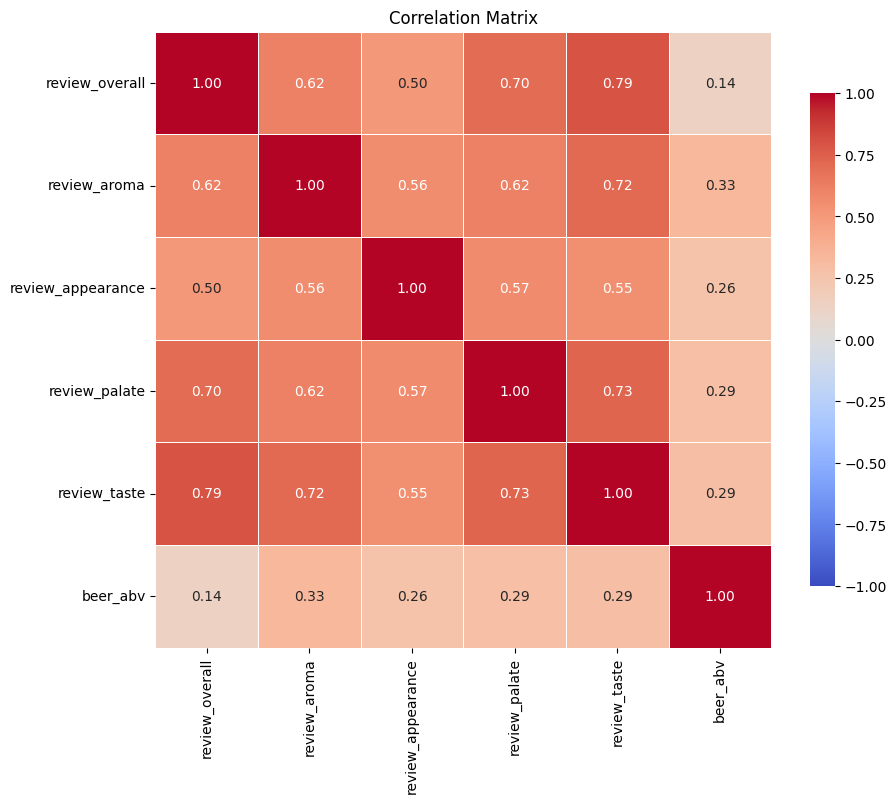

In [10]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.show()

As we're analysing the quality of beer (in this case, overall review value - first row of the matrix), we can see that the feature that has the most impact on it is taste, with 0.79 correlation value. The second place belongs to the palate with 0.70 score. Then we have aroma with 0.62 value, appearance, with 0.50 score and in the last place - abv with 0.14.

Also, something I had to check - according to the internet, taste is about the specific flavors perceived by your taste buds (sweet, sour, salty, bitter, umami).
Palate is the comprehensive experience in your mouth, including taste, texture, aroma, and overall mouthfeel.

So to sum it up - taste is the most important factor according to the reviewers, followed by palate with aroma, appearance and abv being the least impactful. I guess that means no matter how strong the beer is, people will drink it nonetheless.

# Question 4: I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy?

In order to answer that question, first we need to see the average values of aroma and appearance for every style. That would tell us most typical values for certain styles. Let's also add these values to the main dataframe.

In [11]:
data_style_avg = data.groupby('beer_style').agg({
    'review_aroma': 'mean',
    'review_appearance': 'mean'
})
data_style_avg = pd.merge(data, data_style_avg, on='beer_style', suffixes=('', '_style_avg'))
data_style_avg.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_aroma_style_avg,review_appearance_style_avg
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,3.761735,3.828293
1,9020,Yazoo Brewing Company,1224350360,4.0,4.0,3.0,Likeburning,Hefeweizen,4.0,3.5,Hefeweizen,5.0,20575,3.761735,3.828293
2,1454,Broad Ripple Brew Pub,1316545215,4.0,3.5,3.0,JamesS,Hefeweizen,4.0,4.5,Hefe Weizen,4.5,73291,3.761735,3.828293
3,850,Moon River Brewing Company,1133896338,3.5,3.5,3.0,GusterFan,Hefeweizen,3.0,3.5,Wheezy Heifer,5.5,27229,3.761735,3.828293
4,850,Moon River Brewing Company,1193191936,4.0,4.0,3.5,harpo111,Hefeweizen,3.5,3.5,Hefe-Weizen,5.5,2776,3.761735,3.828293


Then, let's group the beers by mean aroma and appearance review values. Also let's filter the data by review count (more than 100 reviews).

In [12]:
data_style_avg = data_style_avg.groupby('beer_name').agg(
    aroma_review=('review_aroma', 'mean'),
    appearance_review=('review_appearance', 'mean'),
    review_aroma_style_avg = ('review_aroma_style_avg', 'mean'),
    review_appearance_style_avg = ('review_appearance_style_avg', 'mean'),
    review_count=('review_overall', 'count')
)
data_style_avg = data_style_avg[data_style_avg['review_count'] > 100]
data_style_avg

,aroma_review,appearance_review,review_aroma_style_avg,review_appearance_style_avg,review_count
beer_name,,,,,
"""Shabadoo"" Black & Tan Ale",3.717949,3.893162,3.271416,3.626166,117
# 100,4.013761,4.153670,4.019343,4.036535,218
#9,3.434466,3.501040,3.525560,3.517985,1442
10 Commandments,4.061017,3.986441,3.972260,4.008293,295
10 Squared Fish Tale Ale,3.946903,3.964602,4.019343,4.036535,113
...,...,...,...,...,...
Éphémère (Cassis / Black Currant),3.834906,3.893868,3.525560,3.517985,212
Équinoxe Du Printemps,3.958333,3.769444,3.875007,3.893584,180
Ølfabrikken Porter,4.269113,4.305810,3.946379,4.039535,327


Then, let's calculate how far each beer is from the style average value, both for aroma and for appearance.

In [13]:
data_style_avg['aroma_diff'] = np.abs(data_style_avg['aroma_review'] - data_style_avg['review_aroma_style_avg'])
data_style_avg['appearance_diff'] = np.abs(data_style_avg['appearance_review'] - data_style_avg['review_appearance_style_avg'])
data_style_avg.head()

,aroma_review,appearance_review,review_aroma_style_avg,review_appearance_style_avg,review_count,aroma_diff,appearance_diff
beer_name,,,,,,,
"""Shabadoo"" Black & Tan Ale",3.717949,3.893162,3.271416,3.626166,117,0.446532,0.266996
# 100,4.013761,4.153670,4.019343,4.036535,218,0.005582,0.117135
#9,3.434466,3.501040,3.525560,3.517985,1442,0.091094,0.016945
10 Commandments,4.061017,3.986441,3.972260,4.008293,295,0.088757,0.021852
10 Squared Fish Tale Ale,3.946903,3.964602,4.019343,4.036535,113,0.072440,0.071933


Let's add both those values up to get the final score that would tell us how close a certain beer is to its style average. Then we can sort by these values to see which beers are the closest to its style.

In [14]:
data_style_avg['final_score'] = data_style_avg['aroma_diff'] + data_style_avg['appearance_diff']
data_style_avg.sort_values('final_score').head()

,aroma_review,appearance_review,review_aroma_style_avg,review_appearance_style_avg,review_count,aroma_diff,appearance_diff,final_score
beer_name,,,,,,,,
New Holland Red Tulip Ale,3.621875,3.806250,3.627254,3.810190,160,0.005379,0.003940,0.009319
Black Marlin Porter,3.839844,3.951172,3.836470,3.957396,256,0.003374,0.006225,0.009598
Harpoon Leviathan - Imperial IPA,4.093098,4.073836,4.097782,4.078916,623,0.004684,0.005080,0.009764
Lindemans Faro Lambic,3.674648,3.760563,3.678982,3.754516,355,0.004334,0.006048,0.010382
Gordon Biersch Hefeweizen,3.767544,3.833333,3.761735,3.828293,114,0.005809,0.005040,0.010849


According to my analysis, the top 3 beers that best match its style would be New Holland Red Tulip Ale, Black Marlin Porter and Harpoon Leviathan - Imperial IPA.